In [1]:
import numpy as np
import wisps
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

from tqdm import tqdm
%matplotlib inline

In [2]:
import wisps.simulations as wispsim

{'wisps': {'F110': (poly1d([ 1.94018506, 15.32070634]), 0.5704897212579523), 'F140': (poly1d([ 0.80998749, 18.3979224 ]), 0.5662446812084643), 'F160': (poly1d([ 1.60054022, 16.02963485]), 1.7686567020674824)}, 'hst3d': {'F110': (None, nan), 'F140': (poly1d([-0.59662894, 24.63686131]), 0.27183032908753735), 'F160': (poly1d([-1.17664627, 26.6759309 ]), 0.30745836180468566)}, 'ncutoff': 50, 'mag_unc_exp': {'F110': [23.937202008130704, 0.041976369832156656, 14.025903082245835], 'F140': [22.943473002413256, 0.03101196695796022, 16.009322647335722], 'F160': [22.943473002413256, 0.03101196695796022, 16.009322647335722]}}


In [3]:
vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name='saumon2008')
#vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name='marley2019')
#vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name='baraffe2003')

In [4]:
#MIX MY COLORMAP WITH COOOLWARM 
colors1 = plt.cm.coolwarm(np.linspace(0., 1, 256))
colors2=plt.cm.YlOrBr(np.linspace(0., 1, 256))
colors = np.vstack((colors1+colors1+colors2)/3)
import matplotlib.colors as mcolors
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [5]:
import seaborn as sns

In [6]:
def plot_grid(model, ax):
    model_filename=wispsim.EVOL_MODELS_FOLDER+'//'+model.lower()+'.csv'
    evolutiomodel=pd.read_csv( model_filename)
    evolutiomodel['logmass']=np.log10(evolutiomodel.mass)
    evolutiomodel['logage']=np.log10(evolutiomodel.age)
    #mp=ax.scatter(np.log10(evolutiomodel.mass), np.log10(evolutiomodel.age), 
    #              c=evolutiomodel.temperature, vmin=200, vmax=3100, cmap=mymap, marker='*', s=200)
    
    print (evolutiomodel['logmass'].min(), evolutiomodel['logmass'].max())
    
    
    sns.lineplot(data=evolutiomodel, x="logage", y="temperature", hue="logmass", palette=mymap, 
                 linewidth=2.5, ax=ax, legend=False, hue_norm=(-3.31, -1), err_style=None)
    
    
    #evolutiomodel.plot.hexbin(x='logmass', y='logage', C='temperature', reduce_C_function=np.nanmean, gridsize=15, cmap=mymap, ax=ax)
    return 

In [7]:
#plt.style.use('dark_background')

-3.3010299956639813 -1.0
-2.6989700043360187 -1.0457574905606752
-3.3010299956639813 -1.0969100130080565
-3.3010299956639813 -1.1249387366083


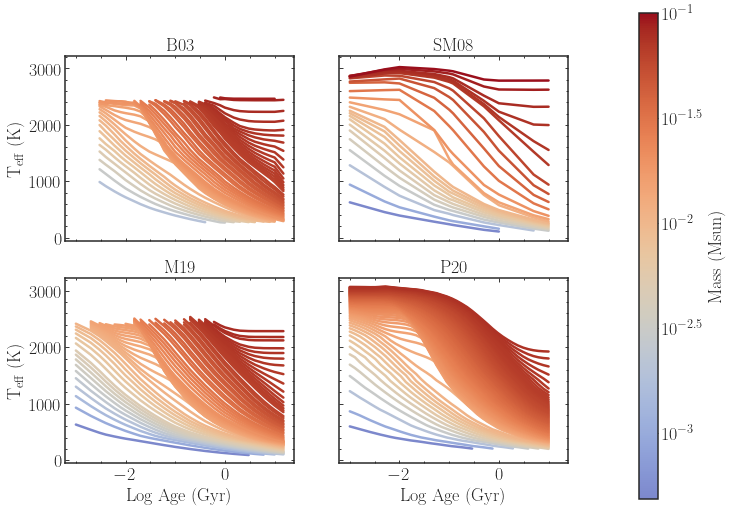

In [15]:
%matplotlib inline

fig, ax=plt.subplots(ncols=2,nrows=2, sharex=True, sharey=True, figsize=(12*0.75, 10*0.75))


mp=plot_grid('baraffe2003', ax[0][1])
plot_grid('saumon2008', ax[0][0])
plot_grid('marley2019', ax[1][0])
plot_grid('phillips2020', ax[1][1])

ax[0][1].set_title('SM08', fontsize=18)
ax[0][0].set_title('B03', fontsize=18)
ax[1][0].set_title('M19', fontsize=18)
ax[1][1].set_title('P20', fontsize=18)

for a in np.concatenate(ax):
    a.set_xlabel(r'Log Age (Gyr)', fontsize=18)
    a.set_ylabel(r'T$_\mathrm{eff}$ (K)', fontsize=18)
    a.minorticks_on()
    #a.grid(which='both', color='#7FDBFF')

cax = fig.add_axes([1.01, 0.06, .03, 0.9])
norm=norm = matplotlib.colors.Normalize(vmin=-3.31,vmax=-1)
mp=matplotlib.cm.ScalarMappable(norm=norm, cmap=mymap)
cbar=plt.colorbar(mp, cax=cax, orientation='vertical')
cbar.ax.set_ylabel(r'Mass (Msun)', fontsize=18)
cbar.ax.set_yticks([10**-3, 10**-2.5, 10**-2, 10**-1.5, 10**-1])
cbar.ax.set_yticklabels([r'10$^{-3}$', r'10$^{-2.5}$', r'10$^{-2}$', r'10$^{-1.5}$', r'10$^{-1}$'])    

plt.savefig(wisps.OUTPUT_FIGURES+'/model_grids.pdf',  rasterized=True, bbox_inches='tight')

In [9]:
s=pd.read_pickle(wisps.OUTPUT_FILES+'/mass_age_spcts_with_binmarley2019.pkl')

(array([24809., 24764., 25189., 25079., 25168., 25270., 24990., 24842.,
        24954., 24935.]),
 array([1.02516434e-03, 8.00922191e-01, 1.60081922e+00, 2.40071624e+00,
        3.20061327e+00, 4.00051030e+00, 4.80040732e+00, 5.60030435e+00,
        6.40020138e+00, 7.20009840e+00, 7.99999543e+00]),
 <BarContainer object of 10 artists>)

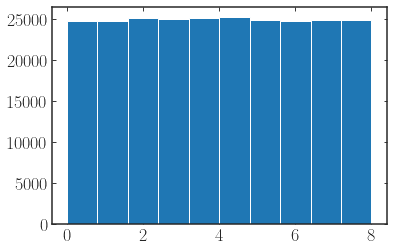

In [10]:
plt.hist(s['sing_evol']['age'].value)

In [11]:
hjk

NameError: name 'hjk' is not defined

In [ ]:

for mod in ['saumon2008', 'marley2019', 'baraffe2003', 'phillips2020']:
    vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name=mod)
    #ts=((vs['prim_evol'])['temperature']).value
    #ms=((vs['prim_evol'])['mass']).value
    vs=pd.read_pickle(wisps.OUTPUT_FILES+'/mass_age_spcts_with_bin{}.pkl'.format(mod))
    ags=((vs['prim_evol'])['age']).value
    
    print (np.nanmax(ags))
    
    h=plt.hist(ags, histtype='step')

In [ ]:
#jhk

In [ ]:
#ts=((vs['prim_evol'])['temperature']).value
#ms=((vs['prim_evol'])['mass']).value
#ags=((vs['prim_evol'])['age']).value

In [ ]:
spts=wisps.splat_teff_to_spt(ts)

In [ ]:
nans=np.isnan(spts)

In [ ]:
len(spts[nans])/len(spts)

In [ ]:
brf=wispsim.simulate_spts(recompute=False, name="baraffe2003")

In [ ]:
brf.keys()

In [ ]:
m0=(brf['sing_evol'])['mass']
m1=(brf['prim_evol'])['mass']
m2=(brf['sec_evol'])['mass']

In [ ]:
fig, ax=plt.subplots(ncols=3, figsize=(10, 4))
h=ax[0].hist(m1.value, bins=32, histtype='step', log=False)
h=ax[1].hist(m2.value, bins=32, histtype='step',  log=False)
h=ax[2].hist((m2/m1).value, bins=32, histtype='step',  log=True)




ax[0].set_xlabel(r'$M_1$', fontsize=18)
ax[1].set_xlabel(r'$M_2$', fontsize=18)
ax[2].set_xlabel(r'$M_2/M_1$', fontsize=18)
plt.tight_layout()

for a in ax:
    a.minorticks_on()
plt.savefig(wisps.OUTPUT_FIGURES+'/mass_ratios.pdf')

In [ ]:
x=np.round(np.array(brf['prim_spt']), decimals=0)
y=np.around(np.array(brf['sec_spt']), decimals=0)

In [ ]:
len(x[np.isnan(x)])/len(x), len(y[np.isnan(y)])/len(y)

In [ ]:
xy=np.vstack([x, y]).T

In [ ]:
vals=wispsim.get_system_type(x, y) 

In [ ]:
nans=np.isnan(vals)

In [ ]:
len(vals[nans])/len(vals)

In [ ]:
'ha'

In [ ]:
def my_limit(spts):
    idx=np.logical_and((spts>= 17), (spts <=40))
    return spts[idx]

In [ ]:
#custom_histogram(teffs_bar, teffgrid, 150)*normteff_bar
spgrid=np.arange(17, 40, 5)

In [ ]:
import seaborn as sns
#flatui =['#001f3f', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70', '#FFDC00']
sns.set_palette(sns.color_palette("cubehelix", 18))

In [ ]:
def bin_by_spt_bin(sp_types, number):
    ranges=[[17, 20], [20, 25], [25, 30], [30, 35], [35, 40]]
    numbers=[]
    for r in ranges:
        idx= np.logical_and((r[0]<=sp_types), (r[1]>sp_types))
        numbers.append(np.nansum(number[idx]))
    return numbers

In [ ]:
vls=wispsim.simulate_spts()

In [ ]:
def get_values(model, b):
    b=round(b, 1)
    
    syst=wispsim.make_systems(model_name=model, bfraction=b)
    
    sps=(syst['system_spts'])

    vls0=len(sps[np.logical_and(sps>=27, sps<32)])
    vls1=len(sps)
    
    return vls0/vls1
    

In [ ]:
import dask

In [ ]:
binfr=np.arange(0.01, 0.9,0.01)


lt_fract=[]
for b in binfr:
    lt_fract.append([ get_values('saumon2008', b), get_values('baraffe2003', b),  
                     get_values('marley2019', b), get_values('phillips2020', b)])


In [ ]:
lt_fract=np.array(lt_fract)

In [ ]:
import seaborn as sns
sns.set_palette(sns.color_palette('tab10', 20))

In [ ]:
fig, ax=plt.subplots()
plt.plot(binfr, lt_fract[:,0]*100, label='S08', linewidth=3)
plt.plot(binfr, lt_fract[:,1]*100, label='B03', linewidth=3)
plt.plot(binfr, lt_fract[:,2]*100, label='M19', linewidth=3)
plt.plot(binfr, lt_fract[:,3]*100, label='P20', linewidth=3)

plt.legend(fontsize=18)
ax.grid(which='both', color='#7FDBFF')
plt.xlabel(r'$\epsilon$', fontsize=18)
plt.ylabel(r'100 $\times$ N[L7-T2]/Ntot', fontsize=18)
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/binary_effects.pdf')

In [ ]:
vs=wispsim.simulate_spts(recompute=False, nsample=2.5*1e5, name='saumon2008')